# IITM - MLP - Week 1

## Imports

In [16]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime

# ---------- Data Manipulation ------------
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Scipy ------------
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy import stats

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

## Common helper functions

In [17]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

def many_scores_at_once(y_true, y_pred):
  
    Functions = [skm.explained_variance_score, skm.max_error, skm.mean_absolute_error, skm.mean_squared_error, (lambda x,y : skm.mean_squared_error(x, y, squared =False)), skm.r2_score]
    Names = ("Explained variance score : ", "Max Error : ", "Mean Absolute Error :", "Mean Squared Error: ","Root Mean Squared Error: ", "R squared score: ")

## Get the Data

### Load Data

In [18]:
root_path = r"C:\Users\tusha\Jupyter_notebooks\IITM_Term_5\MLP"
os.listdir(root_path)

['.ipynb_checkpoints',
 'MLP_Week_1.ipynb',
 'MLP_Week_2.ipynb',
 'winequality-red.csv']

In [19]:
# data_url = "https://.........."
# df = pd.read_csv(data_url, sep=",") # to download data from web

data_path = os.path.join(root_path, 'winequality-red.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (1599, 12)


### Check Data Samples

In [20]:
df.head() 
# Return the first `n` rows.
# By default first 5 rows
# For negative values of `n`, this function returns all rows except
# the last `n` rows, equivalent to ``df[:-n]``.
# Check more ?df.head

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Features

In [21]:
features = df.columns[:-1].values
label = df.columns[-1:].values # OR [df.columns[-1]]

print(f'Feature: {features}\nLabel: {label}')

Feature: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


### Statistics

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
df.quality.value_counts()
# Unbalance class distribution
# Quality ranges from 0 to 10 but all values are 3 to 8
# Most values lie in 5 and 6

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Visualization

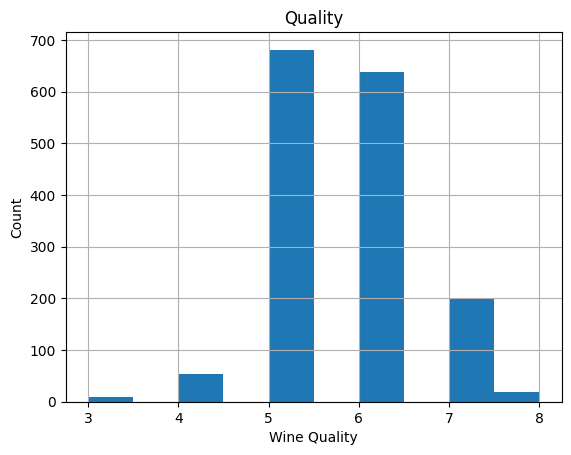

In [25]:
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Quality')
plt.show()

#### Histogram with for loop

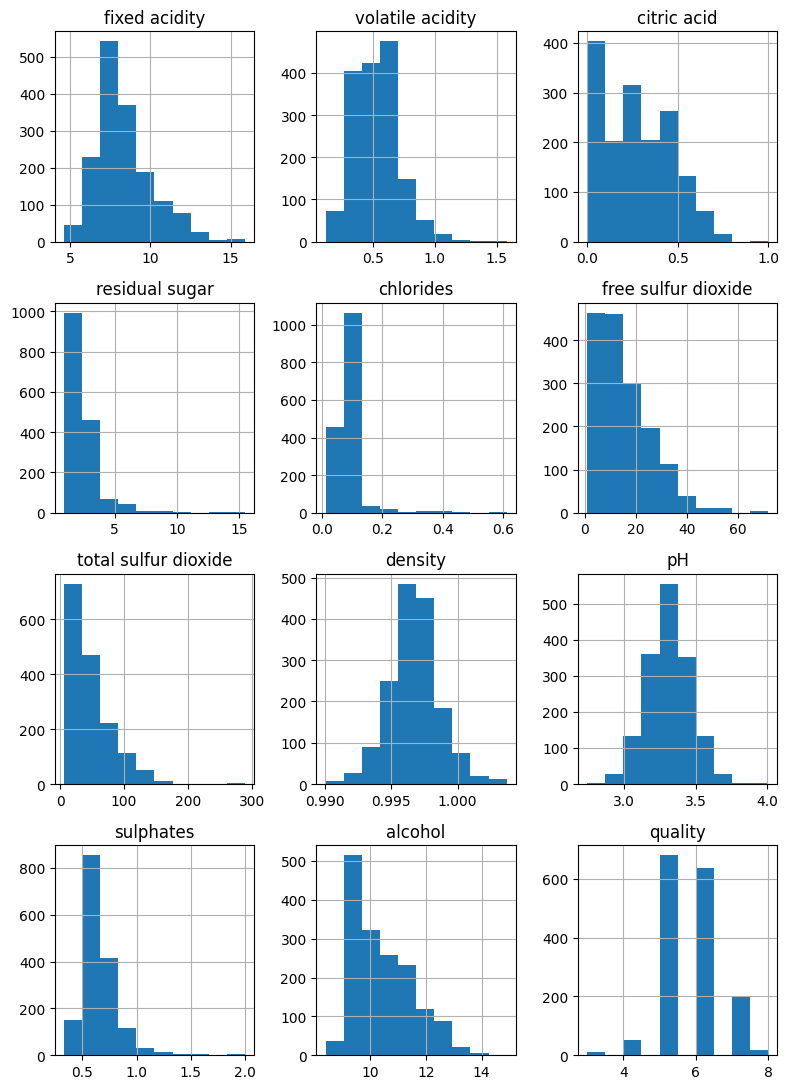

In [26]:
# Histogram of Features

plt.figure(figsize=(8,11))
columns = list(df.columns)
for i in range(0, len(columns)):
    plt.subplot(4, 3, i+1) # row, col, index
    df[columns[i]].hist()
    #plt.xlabel(columns[i])
    #plt.ylabel('Count')
    plt.title(columns[i])
plt.tight_layout()
plt.show()

#### Histogram with less efforts

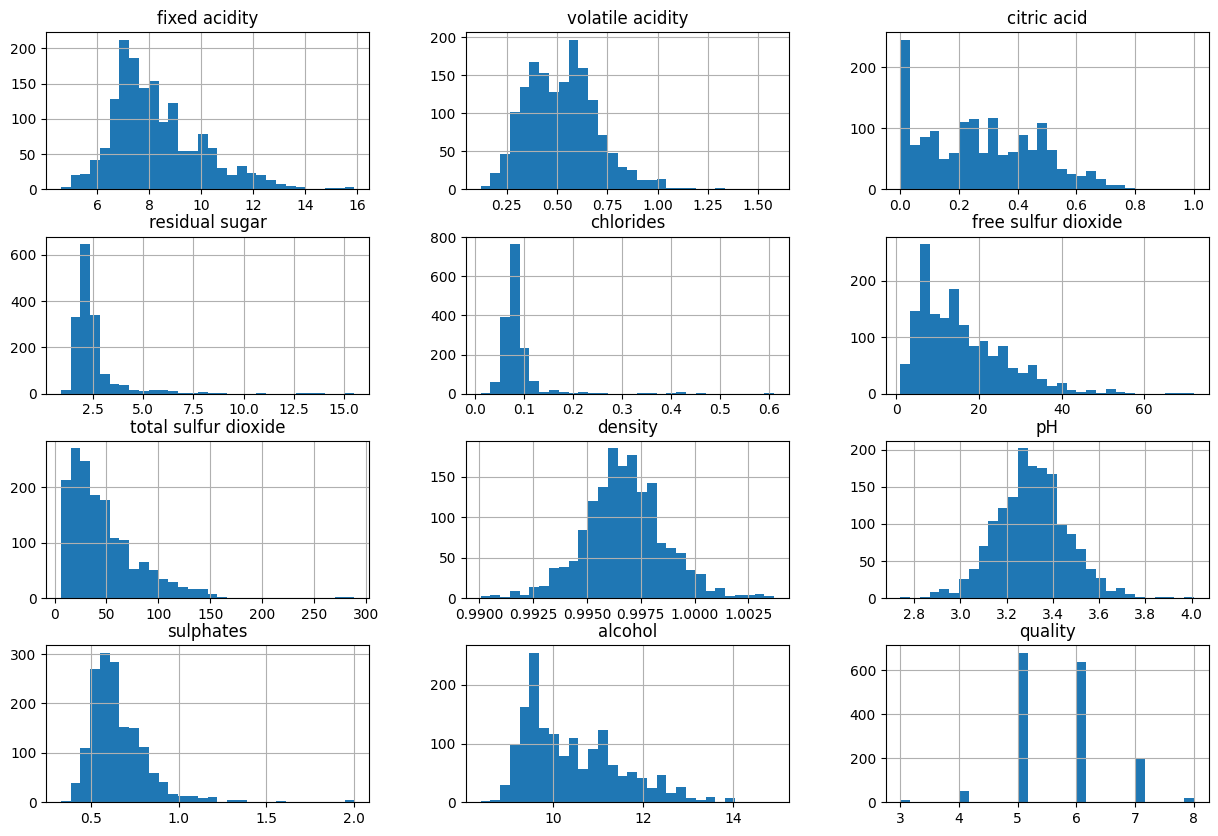

In [27]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Data Split

#### Train test split - Random Sampling

In [28]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, 
                                       shuffle=True, stratify=None)
# By default : shuffle=True, stratify=None

#### Train test split - Stratified Sampling

In [29]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['quality']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

#### Difference between Random and Stratified

In [30]:
overall_dist = df.quality.value_counts()/len(df)
strat_dist = strat_test_set['quality'].value_counts()/len(strat_test_set)
random_dist = test_set['quality'].value_counts()/len(test_set)

In [31]:
dist_comparison = pd.DataFrame({'overall':overall_dist,
                               'stratified':strat_dist,
                               'random':random_dist})

dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)%'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)%'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

In [32]:
dist_comparison
#random split doesnt perform well when label data has unbalanced classes

,overall,stratified,random,diff(s-o),diff(s-o)%,diff(r-o),diff(r-o)%
3,0.006254,0.006250,0.003125,-0.000004,-0.062500,-0.003129,-50.031250
4,0.033146,0.034375,0.031250,0.001229,3.708726,-0.001896,-5.719340
5,0.425891,0.425000,0.406250,-0.000891,-0.209251,-0.019641,-4.611784
6,0.398999,0.400000,0.412500,0.001001,0.250784,0.013501,3.383621
7,0.124453,0.125000,0.131250,0.000547,0.439698,0.006797,5.461683
8,0.011257,0.009375,0.015625,-0.001882,-16.718750,0.004368,38.802083


## Data Visualization

In [33]:
explortion_set = strat_train_set.copy()

### Scatter plot

#### With Seaborn

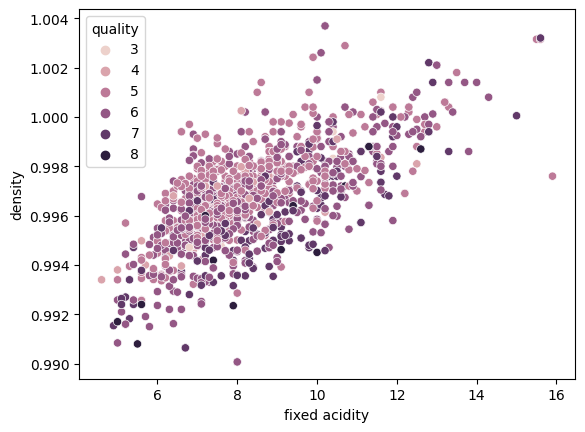

In [34]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',
               data=explortion_set)
plt.show()

#### With Matplotlib

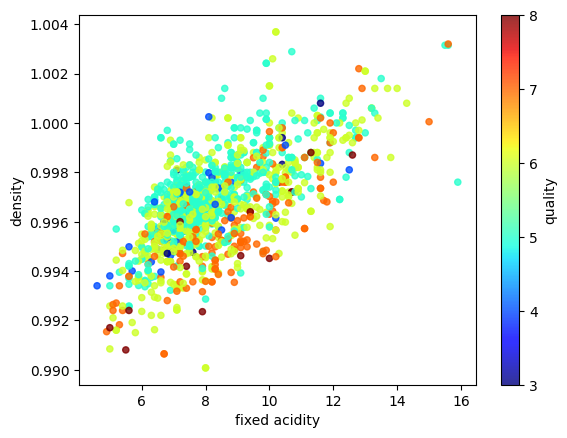

In [35]:
explortion_set.plot(kind='scatter', x='fixed acidity', y='density',
                    c='quality', alpha=0.8, cmap=plt.get_cmap("jet"))
plt.show()

### Relations

In [36]:
corr_mat = explortion_set.corr()
corr_mat['quality']
# quality - alcohol : strong positive: 0.47
# quality - volatile acidity : strong negative: -0.38

fixed acidity           0.103270
volatile acidity       -0.386368
citric acid             0.218125
residual sugar          0.013390
chlorides              -0.122898
free sulfur dioxide    -0.050349
total sulfur dioxide   -0.181482
density                -0.191508
pH                     -0.054564
sulphates               0.252926
alcohol                 0.473754
quality                 1.000000
Name: quality, dtype: float64

#### HeatMap With Seaborn

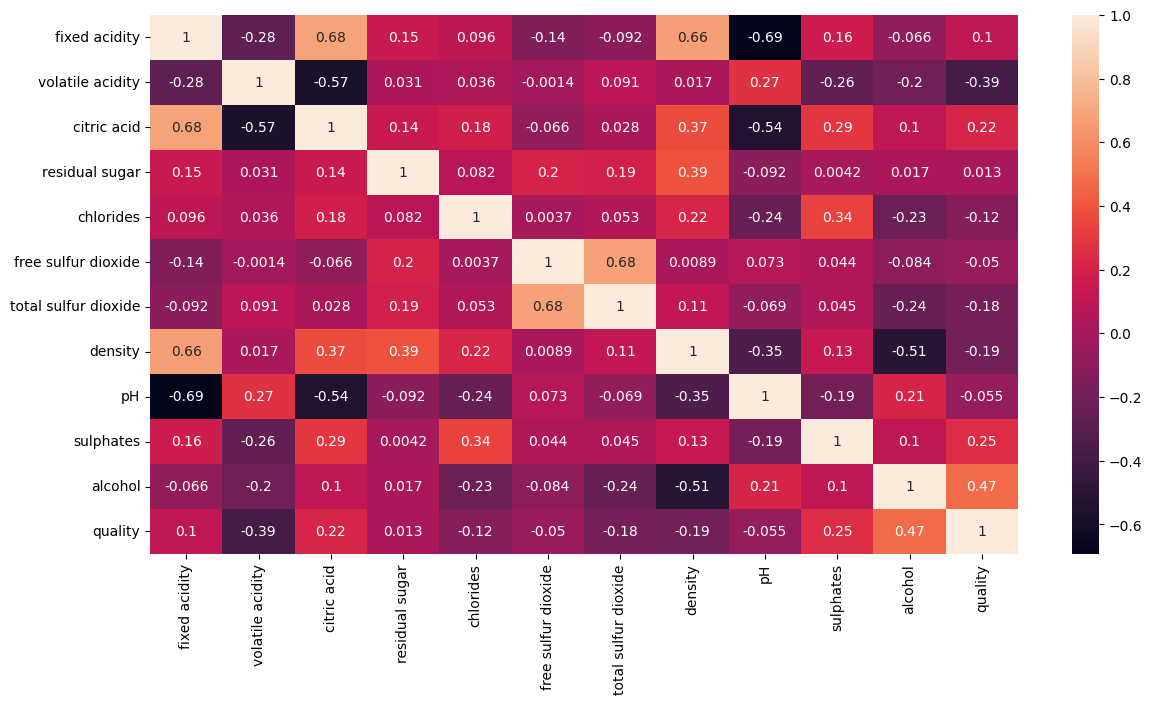

In [37]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True)
plt.show()

#### HeatMap With Seaborn (lower triangular)

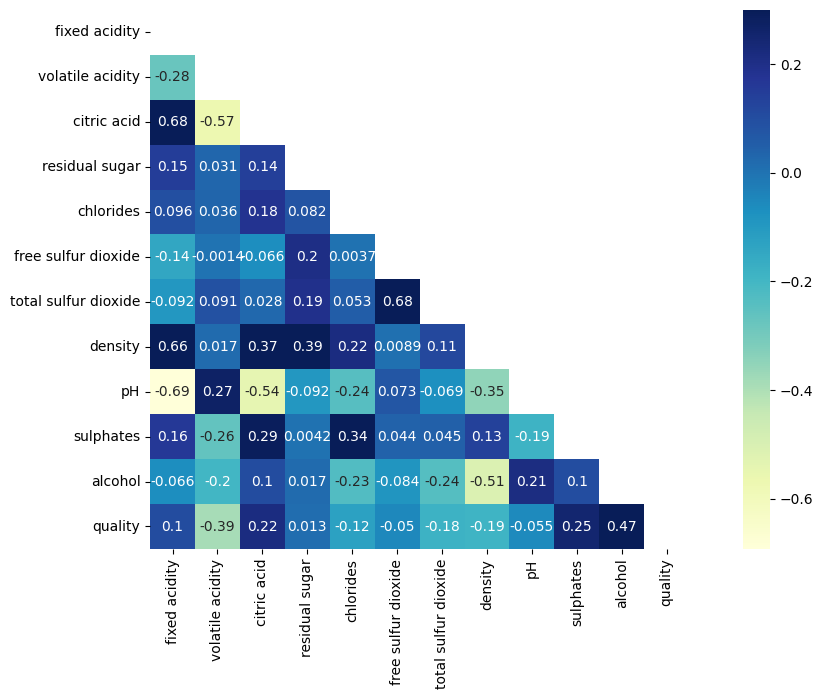

In [38]:
plt.figure(figsize=(14,7))
corr_mat = explortion_set.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True,  cmap="YlGnBu", annot=True)
plt.show()

### Rank Correlation

In [39]:
r,p = pearsonr(explortion_set['volatile acidity'], 
               explortion_set['quality'])
# r: correlation coefficient
# p: p-value
r,p 

(-0.3863676716926378, 8.484447830246525e-47)

In [40]:
columns = list(explortion_set.columns)
pear = [pearsonr(explortion_set[col], explortion_set['quality'])[0] for col in columns]
spear = [spearmanr(explortion_set[col], explortion_set['quality'])[0] for col in columns]
kendall = [kendalltau(explortion_set[col], explortion_set['quality'])[0] for col in columns]

corr_df = pd.DataFrame({'Feature':columns,
                       'Pearson Corr w/ quality':pear,
                       'Spearman Corr w/ quality':spear,
                       'Kendall Corr w/ quality':kendall})
corr_df

,Feature,Pearson Corr w/ quality,Spearman Corr w/ quality,Kendall Corr w/ quality
0,fixed acidity,0.103270,0.092058,0.070951
1,volatile acidity,-0.386368,-0.378554,-0.299883
2,citric acid,0.218125,0.201779,0.157900
3,residual sugar,0.013390,0.020768,0.016694
4,chlorides,-0.122898,-0.200324,-0.156899
5,free sulfur dioxide,-0.050349,-0.047711,-0.038598
6,total sulfur dioxide,-0.181482,-0.187867,-0.149671
7,density,-0.191508,-0.199082,-0.153552
8,pH,-0.054564,-0.036386,-0.028696
9,sulphates,0.252926,0.372172,0.295627


#### HeatMap - Spearman corr

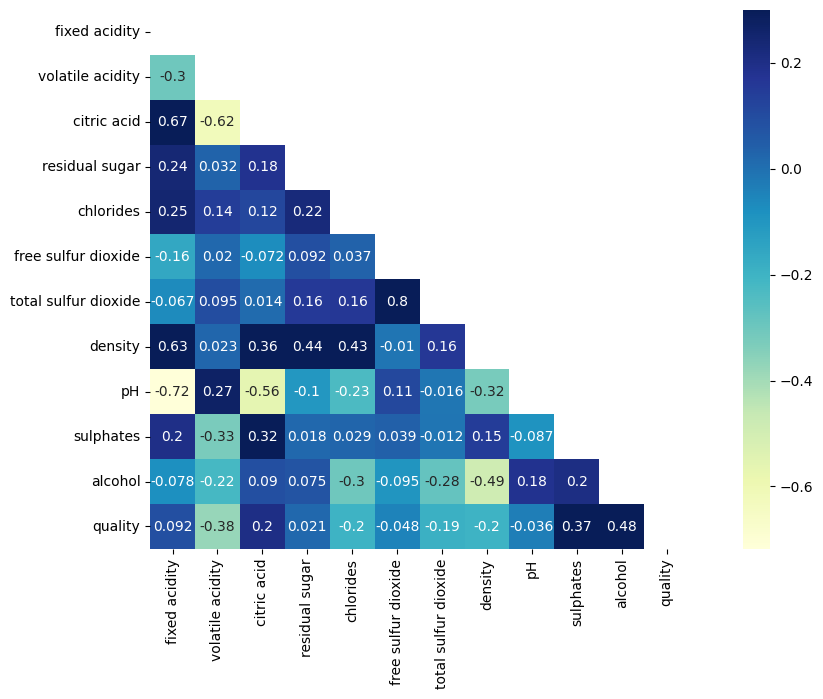

In [41]:
plt.figure(figsize=(14,7))

corr_mat = explortion_set.corr(method="spearman") 
# method = {'pearson', 'kendall', 'spearman'}
# default : pearson

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True,  cmap="YlGnBu", annot=True)
plt.show()

#### Scatter Matrix

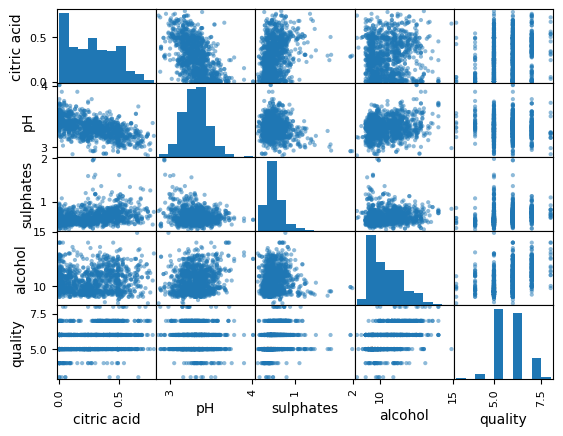

In [42]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 
           'residual sugar', 'chlorides', 'free sulfur dioxide', 
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 
           'alcohol', 'quality']

attributes = ['citric acid', 'pH', 'sulphates', 'alcohol', 'quality']

scatter_matrix(explortion_set[attributes])
plt.show()

## Data Preparation

### Seprate feature and label

In [43]:
wine_features = strat_train_set.drop('quality', axis=1) 
wine_label = strat_train_set['quality'].copy()

### Data Cleaning (outliers, missing values)

#### Check for missing values

In [44]:
wine_features.isna().sum() #count number of nan for each feature col

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [45]:
wine_label.isna().sum() #count number of nan for each feature col

0

#### Imputation for missing values

In [46]:
imputer = SimpleImputer(strategy="median")
# missing values willbe filled with median of that column

imputer.fit(wine_features)
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.079  , 14.     ,
       37.     ,  0.99672,  3.31   ,  0.62   , 10.2    ])

In [47]:
wine_features.median()
# these values matches with median imputer sttistics_ values

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    37.00000
density                  0.99672
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

#### Fill missing values with median and convert np array to df

In [48]:
tr_feat = imputer.transform(wine_features)
print(f'Type: {type(tr_feat)}')
print(f'Shape: {tr_feat.shape}')

Type: <class 'numpy.ndarray'>
Shape: (1279, 11)


In [49]:
wine_features_transformed = pd.DataFrame(tr_feat, 
                                         columns=wine_features.columns)
wine_features_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.0,0.600,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0
1,9.9,0.440,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9
2,11.9,0.580,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0
3,8.7,0.820,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8
4,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0


### Handling Text and Categorical attributes

#### Ordinal encoding

In [50]:
ordinal_encoder = OrdinalEncoder()
# ordinal_encoder.fit_transform() # convert text to num
# ordinal_encoder.categories_ # list of categories

In [51]:
# When there is no systematic order in categories then ML algo may assume that two nearby values are closer than the distinct ones
# So use one hot encoding to overcome this problem

#### One hot encoding

In [52]:
# hot 1 , cold 0
cat_encoder = OneHotEncoder()
# cat_encoder.fit_transform()
# # output is Scipy sparse matrix to save space
# cat_encoder.categories_ # list of categories

### Feature Scaling

#### Pipeline

In [53]:
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scalar', StandardScaler())])
# name, estimator pair
# each name should be unique and shoudnt contain double underscore
# last estimator methods can be applied on pipeline object

wine_features_transformed = transform_pipeline.fit_transform(wine_features)

#### Column Transformer for mixed features

In [54]:
# # Dummy code as we dont have categorical features in our df now

# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="median")),
#     ('std_scalar', StandardScaler())])

# numerical_attrs = list(wine_features)
# categorical_attrs = ['dummy_cat_feat']

# full_pipeline = ColumnTransformer([
#     ("numerical", numerical_pipeline, numerical_attrs),
#     ("categorical", OneHotEncoder(), categorical_attrs)])
    
# wine_features_transformed = full_pipeline.fit_transform(wine_features)

## Select and Train ML model

### Build quick baseline model

In [55]:
# We are using Linear Regression

#### Linear Regression model Train

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(wine_features_transformed, wine_label)
quality_pred = lin_reg.predict(wine_features_transformed)
mse_train = mean_squared_error(wine_label, quality_pred)
print(f'MSE on train set: {mse_train}')

MSE on train set: 0.42423446043661145


#### Test data preprocessing

In [57]:
wine_features_test = strat_test_set.drop('quality', axis=1)
wine_label_test = strat_test_set.quality.copy()
wine_features_test_transformed = transform_pipeline.fit_transform(wine_features_test)

#### Linear Regression model Train

In [58]:
quality_test_pred = lin_reg.predict(wine_features_test_transformed)
mse_test = mean_squared_error(wine_label_test, quality_test_pred)
print(f'MSE on test set: {mse_test}')

MSE on test set: 0.391551071111617


#### Visualize error

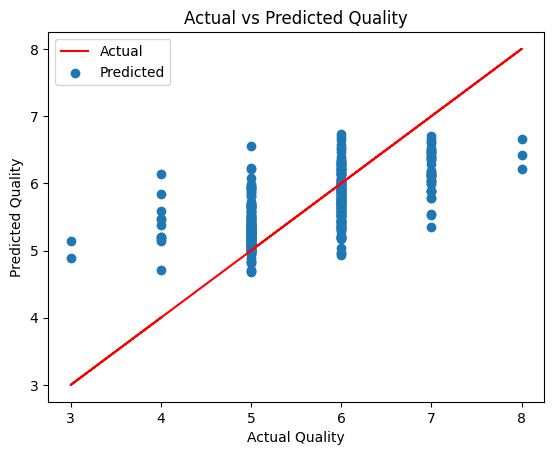

In [59]:
plt.scatter(wine_label_test, quality_test_pred, label='Predicted')
plt.plot(wine_label_test, wine_label_test, 'r-', label='Actual')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.legend()
plt.show()

### Use different model and compare performance with baseline model

#### Decision Tree Regression model Train

In [60]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_transformed, wine_label)
quality_pred = tree_reg.predict(wine_features_transformed)
mse_train = mean_squared_error(wine_label, quality_pred)
print(f'MSE on train set: {mse_train}')

MSE on train set: 0.0


#### Decision Tree Regression model Test

In [61]:
quality_test_pred = tree_reg.predict(wine_features_test_transformed)
mse_test = mean_squared_error(wine_label_test, quality_test_pred)
print(f'MSE on test set: {mse_test}')

MSE on test set: 0.6625


In [62]:
# now train error is 0 and test error is 0.65 . This is overfitting

#### Visualize error

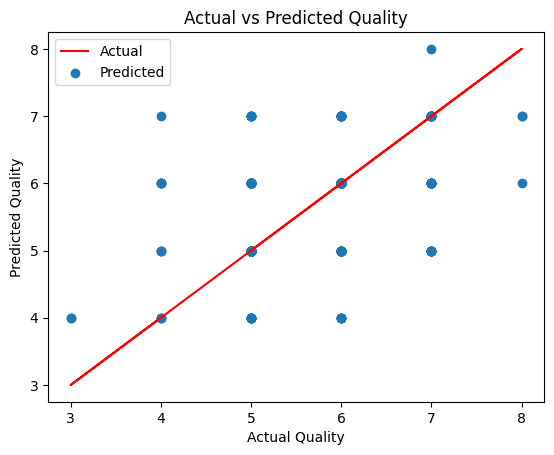

In [63]:
plt.scatter(wine_label_test, quality_test_pred, label='Predicted')
plt.plot(wine_label_test, wine_label_test, 'r-', label='Actual')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.legend()
plt.show()

### Use cross validation

#### Use CV on Linear Reg

In [64]:
scores = cross_val_score(lin_reg, wine_features_transformed, 
                         wine_label, scoring="neg_mean_squared_error",
                        cv = 10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.54286678 0.4430182  0.55517407 0.33392411 0.47108594 0.37292148
 0.4018929  0.31147068 0.43758473 0.47402583]
Mean: 0.4343964724173121
Std Dev: 0.07706830931546955


#### Use CV on Decision Tree

In [65]:
scores = cross_val_score(tree_reg, wine_features_transformed, 
                         wine_label, scoring="neg_mean_squared_error",
                        cv = 10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.7890625  0.6875     0.765625   0.53125    0.7421875  0.4453125
 0.6640625  0.71875    0.7890625  0.88976378]
Mean: 0.7022576279527559
Std Dev: 0.12371402844346449


#### Compare Linear Reg and Decision Tree

In [66]:
# Mean squared error and std dev should be minimum 
# Lin Reg has better MSE and more precise estimation compared to Decision Tree

### Ensemble Learning: Random forest

In [67]:
# RF builds multiple DT and then avg their predictions

In [68]:
rf_reg = RandomForestRegressor()
rf_reg.fit(wine_features_transformed, wine_label)
scores = cross_val_score(rf_reg, wine_features_transformed, 
                         wine_label, scoring="neg_mean_squared_error",
                        cv = 10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.446675   0.35647656 0.44109141 0.26988125 0.43016641 0.24245859
 0.29631719 0.30135469 0.38736797 0.41384094]
Mean: 0.358563000738189
Std Dev: 0.07216887066587162


In [69]:
quality_pred = rf_reg.predict(wine_features_transformed)
mse_train = mean_squared_error(wine_label, quality_pred)
print(f'MSE on train set: {mse_train}')

quality_test_pred = rf_reg.predict(wine_features_test_transformed)
mse_test = mean_squared_error(wine_label_test, quality_test_pred)
print(f'MSE on test set: {mse_test}')

MSE on train set: 0.04861985926505081
MSE on test set: 0.309265625


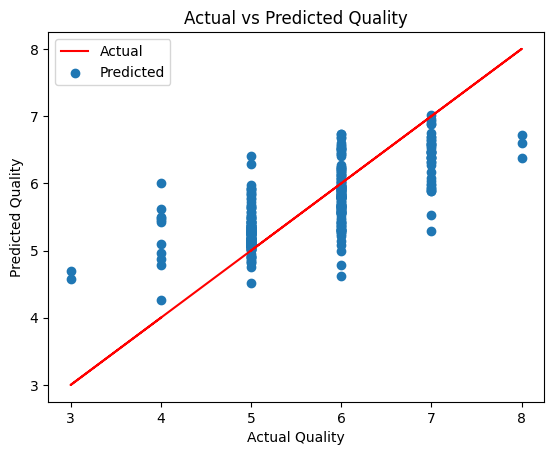

In [70]:
plt.scatter(wine_label_test, quality_test_pred, label='Predicted')
plt.plot(wine_label_test, wine_label_test, 'r-', label='Actual')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.legend()
plt.show()

## Fine Tune ML model

### Tuning Random Forest using GridSearchCV

In [71]:
# Combination 1]
# number of estimators: 3, 10, 30
# max num of features: 2, 4, 6, 8
# bootstrap : True (default)
# total comb: 3*4 = 12
    
# Combination 2]
# number of estimators: 3, 10
# max num of features: 2, 3, 4
# bootstrap : False 
# total comb: 2*3 = 6

# Total values in Grid = 12+6 = 18
# CV = 5 # per comb run 5 times on diff splits
# total model runs : 18*5 = 90
    
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8], 'bootstrap':[True]},
    {'n_estimators':[3,10], 'max_features':[2,3,4], 'bootstrap':[False]}
]

grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [72]:
grid_search.fit(wine_features_transformed, wine_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 30}

In [74]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [75]:
# cv_res = grid_search.cv_results_
# for mean_score, param in zip(cv_res['mean_test_score'],cv_res['params']):
#     print(-mean_score, param)

In [76]:
cv_res = grid_search.cv_results_
boot = [i['bootstrap'] for i in cv_res['params']]
n_est = [i['n_estimators'] for i in cv_res['params']]
max_feat = [i['max_features'] for i in cv_res['params']]

cv_res_df = pd.DataFrame({'mean_score':-cv_res['mean_test_score'],
                         'bootstrap':boot, 
                          'n_est':n_est, 
                          'max_feat':max_feat})
# mean score should be minimum
cv_res_df.sort_values(by=['mean_score'], ascending=True)

,mean_score,bootstrap,n_est,max_feat
2,0.359550,True,30,2
8,0.359594,True,30,6
11,0.364004,True,30,8
5,0.367123,True,30,4
17,0.370120,False,10,4
7,0.380460,True,10,6
15,0.384847,False,10,3
13,0.385686,False,10,2
10,0.386278,True,10,8
1,0.388277,True,10,2


### Analysis of best Model

In [77]:
feature_imp = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_imp, features), reverse=True)

[(0.17407865174630624, 'alcohol'),
 (0.12947213743089483, 'volatile acidity'),
 (0.12810454721601855, 'sulphates'),
 (0.0915709913083362, 'density'),
 (0.0809037656285662, 'citric acid'),
 (0.07751721431595997, 'chlorides'),
 (0.07305520098929409, 'total sulfur dioxide'),
 (0.06328332461612825, 'residual sugar'),
 (0.06290904907709201, 'pH'),
 (0.06146332380581419, 'fixed acidity'),
 (0.05764179386558931, 'free sulfur dioxide')]

### Evaluation on test set

In [78]:
# use transformed test data

quality_test_pred = grid_search.best_estimator_.predict(wine_features_test_transformed)
mse_test = mean_squared_error(wine_label_test, quality_test_pred)
print(f'MSE on test set: {mse_test}')

MSE on test set: 0.3268715277777778


#### Visualize error

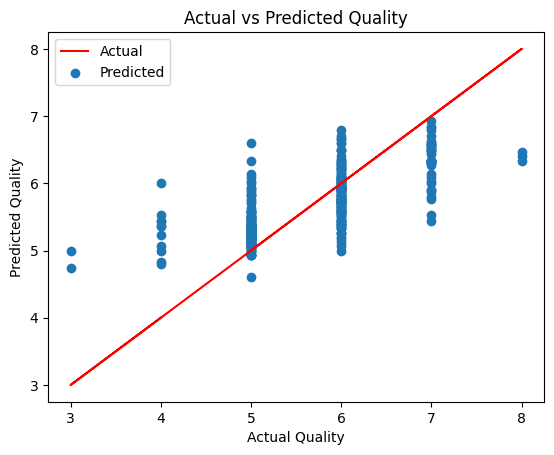

In [79]:
plt.scatter(wine_label_test, quality_test_pred, label='Predicted')
plt.plot(wine_label_test, wine_label_test, 'r-', label='Actual')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.legend()
plt.show()

#### Confidence Interval

In [80]:
confidence = 0.95 # expected
sq_errors = (wine_label_test-quality_test_pred)**2
stats.t.interval(confidence, len(sq_errors)-1,
                loc=sq_errors.mean(),
                scale=stats.sem(sq_errors))

# input is sq_erros so 95% of sq_errors lies in between 0.256, 0.384.

(0.2624921757663003, 0.3912508797892555)

## Present Solution

## Launch Monitor Maintain

# Sklearn Datasets

## Loaders

### Iris Dataset

In [81]:
data = load_iris()

print(f'Data Loaded: {data.filename}\n')
print(f'Type of data: {type(data)}\n')
print(f'Keys of data: {list(data.keys())}\n')
print(f'Features: {data.feature_names}\n')
print(f'Targets: {data.target_names}\n')
print(f'Data from data: \n\tType: {type(data.data)}\n\tShape: {data.data.shape}\n\tSample: {data.data[:3]}\n')
print(f'Target from data: \n\tType: {type(data.target)}\n\tShape: {data.target.shape}\n\tSample: {data.target[:3]}')


Data Loaded: iris.csv

Type of data: <class 'sklearn.utils.Bunch'>

Keys of data: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Targets: ['setosa' 'versicolor' 'virginica']

Data from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (150, 4)
	Sample: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Target from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (150,)
	Sample: [0 0 0]


In [82]:
print(f'Data Description:\n{data.DESCR}')

Data Description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =======

In [83]:
feature_matrix, label_vector = load_iris(return_X_y=True)
print(f'Type of feature matrix: {type(feature_matrix)}')
print(f'Shape of feature matrix: {feature_matrix.shape}')
print(f'Type of label matrix: {type(label_vector)}')
print(f'Shape of label matrix: {label_vector.shape}')

Type of feature matrix: <class 'numpy.ndarray'>
Shape of feature matrix: (150, 4)
Type of label matrix: <class 'numpy.ndarray'>
Shape of label matrix: (150,)


## Fetchers

### California housing Dataset

In [84]:
data = fetch_california_housing()

In [85]:
print(f'Type of data: {type(data)}\n')
print(f'Keys of data: {list(data.keys())}\n')
print(f'Features: {data.feature_names}\n')
print(f'Targets: {data.target_names}\n')
print(f'Data from data: \n\tType: {type(data.data)}\n\tShape: {data.data.shape}\n\tSample: {data.data[:3]}\n')
print(f'Target from data: \n\tType: {type(data.target)}\n\tShape: {data.target.shape}\n\tSample: {data.target[:3]}')

Type of data: <class 'sklearn.utils.Bunch'>

Keys of data: ['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Targets: ['MedHouseVal']

Data from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (20640, 8)
	Sample: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]

Target from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (20640,)
	Sample: [4.526 3.585 3.521]


In [86]:
print(f'Data Description:\n{data.DESCR}')

Data Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This d

### Openml Dataset

In [87]:
# feature_matrix, label_vector = fetch_openml('mnist_784', version=1, return_X_y=True)

In [88]:
print(f'Type of feature matrix: {type(feature_matrix)}')
print(f'Shape of feature matrix: {feature_matrix.shape}')
print(f'Type of label matrix: {type(label_vector)}')
print(f'Shape of label matrix: {label_vector.shape}')

Type of feature matrix: <class 'numpy.ndarray'>
Shape of feature matrix: (150, 4)
Type of label matrix: <class 'numpy.ndarray'>
Shape of label matrix: (150,)


## Generators

### Regression

In [89]:
X, y = make_regression(n_samples=100, n_features=5, n_targets=1,
                      shuffle=True, random_state=42)

print(f'Feature matrix X: \n\tType: {type(X)}\n\tShape: {X.shape}\n\tSample: {X[:3]}\n')
print(f'Label matrix y: \n\tType: {type(y)}\n\tShape: {y.shape}\n\tSample: {y[:3]}')

Feature matrix X: 
	Type: <class 'numpy.ndarray'>
	Shape: (100, 5)
	Sample: [[-0.93782504  0.51504769  0.51503527  3.85273149  0.51378595]
 [ 1.0889506  -0.71530371  0.06428002  0.67959775 -1.07774478]
 [-0.60170661 -1.05771093  1.85227818  0.82254491 -0.01349722]]

Label matrix y: 
	Type: <class 'numpy.ndarray'>
	Shape: (100,)
	Sample: [271.31612081   6.2305406   11.86102446]


### Classification

#### Binary Classification

In [90]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2,
                      n_clusters_per_class=1, random_state=42)

print(f'Feature matrix X: \n\tType: {type(X)}\n\tShape: {X.shape}\n\tSample: {X[:3]}\n')
print(f'Label matrix y: \n\tType: {type(y)}\n\tShape: {y.shape}\n\tSample: {y[:3]}')

Feature matrix X: 
	Type: <class 'numpy.ndarray'>
	Shape: (100, 5)
	Sample: [[0.45391954 0.22241184 0.74729361 0.73455812 0.69161946]
 [1.04253152 0.51044698 1.09877685 1.68538712 1.63306798]
 [1.36517067 0.66894846 0.62962884 2.20938257 2.07514881]]

Label matrix y: 
	Type: <class 'numpy.ndarray'>
	Shape: (100,)
	Sample: [1 1 1]


#### Multilabel Classification

In [91]:
X, y = make_multilabel_classification(n_samples=100, n_features=20, 
                                      n_classes=5, n_labels=2)

print(f'Feature matrix X: \n\tType: {type(X)}\n\tShape: {X.shape}\n\tSample: {X[:3]}\n')
print(f'Label matrix y: \n\tType: {type(y)}\n\tShape: {y.shape}\n\tSample: {y[:3]}')

Feature matrix X: 
	Type: <class 'numpy.ndarray'>
	Shape: (100, 20)
	Sample: [[3. 6. 6. 2. 4. 1. 6. 2. 2. 4. 4. 0. 5. 2. 0. 2. 4. 1. 4. 2.]
 [2. 0. 6. 0. 2. 3. 0. 1. 0. 4. 2. 2. 4. 4. 1. 4. 1. 2. 1. 5.]
 [0. 8. 6. 1. 1. 0. 0. 1. 4. 2. 7. 5. 2. 2. 2. 0. 0. 1. 8. 4.]]

Label matrix y: 
	Type: <class 'numpy.ndarray'>
	Shape: (100, 5)
	Sample: [[1 0 0 1 0]
 [1 1 0 1 1]
 [0 0 1 0 0]]


### Clustering

In [92]:
X, y = make_blobs(n_samples=100, n_features=5, 
                  centers=3, random_state=42)

print(f'Feature matrix X: \n\tType: {type(X)}\n\tShape: {X.shape}\n\tSample: {X[:3]}\n')
print(f'Label matrix y: \n\tType: {type(y)}\n\tShape: {y.shape}\n\tSample: {y[:3]}')

Feature matrix X: 
	Type: <class 'numpy.ndarray'>
	Shape: (100, 5)
	Sample: [[-3.00263011  9.93744874  6.34648379  2.8467591  -6.87048285]
 [-5.97037142 -9.04078528  7.38441952  2.66946293  4.28754638]
 [-2.29055931  9.89604717  3.63079349  0.38987547 -6.10592677]]

Label matrix y: 
	Type: <class 'numpy.ndarray'>
	Shape: (100,)
	Sample: [0 1 0]


# Assignment

In [93]:
data = load_breast_cancer()

print(f'Data Loaded: {data.filename}\n')
print(f'Type of data: {type(data)}\n')
print(f'Keys of data: {list(data.keys())}\n')
print(f'Features: {data.feature_names}\n')
print(f'Targets: {data.target_names}\n')
print(f'Data from data: \n\tType: {type(data.data)}\n\tShape: {data.data.shape}\n\tSample: {data.data[:3]}\n')
print(f'Target from data: \n\tType: {type(data.target)}\n\tShape: {data.target.shape}\n\tSample: {data.target[:3]}')


Data Loaded: breast_cancer.csv

Type of data: <class 'sklearn.utils.Bunch'>

Keys of data: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Targets: ['malignant' 'benign']

Data from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (569, 30)
	Sample: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.5

In [94]:
print(f'Data Description:\n{data.DESCR}')

Data Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fi

In [95]:
feature_matrix, label_vector = load_breast_cancer(return_X_y=True)
print(f'Type of feature matrix: {type(feature_matrix)}')
print(f'Shape of feature matrix: {feature_matrix.shape}')
print(f'Type of label matrix: {type(label_vector)}')
print(f'Shape of label matrix: {label_vector.shape}')

Type of feature matrix: <class 'numpy.ndarray'>
Shape of feature matrix: (569, 30)
Type of label matrix: <class 'numpy.ndarray'>
Shape of label matrix: (569,)


In [96]:
d = np.c_[data.data, data.target]
columns = np.append(data.feature_names, ["target"])
df = pd.DataFrame(d, columns=columns)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [97]:
# 212 - Malignant - 0 , 357 - Benign - 1
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [84]:
data = fetch_california_housing()

In [85]:
print(f'Type of data: {type(data)}\n')
print(f'Keys of data: {list(data.keys())}\n')
print(f'Features: {data.feature_names}\n')
print(f'Targets: {data.target_names}\n')
print(f'Data from data: \n\tType: {type(data.data)}\n\tShape: {data.data.shape}\n\tSample: {data.data[:3]}\n')
print(f'Target from data: \n\tType: {type(data.target)}\n\tShape: {data.target.shape}\n\tSample: {data.target[:3]}')

Type of data: <class 'sklearn.utils.Bunch'>

Keys of data: ['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Targets: ['MedHouseVal']

Data from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (20640, 8)
	Sample: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]

Target from data: 
	Type: <class 'numpy.ndarray'>
	Shape: (20640,)
	Sample: [4.526 3.585 3.521]


# END